In [1]:
# add dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from scipy.stats import linregress

In [2]:
#Questions to Answer
# Are Sales Increasing? 
# What products are selling the most? 
# What products are selling the least? 
# Do Higher Discounts result in more products sold? Total Net Sales? 
# What products are increasing the most in demand? 

In [3]:
# write paths to files
sales_path = os.path.join("Resources","business.retailsales.csv")
monthly_sales_path = os.path.join("Resources","business.retailsales2.csv")

# read files to pandas dataframes
sales_df = pd.read_csv(sales_path)
monthly_sales_df = pd.read_csv(monthly_sales_path)

In [4]:
sales_df.head()

Product Type  Net Quantity  Gross Sales  Discounts  Returns  \
0  Art & Sculpture            34      14935.0    -594.00  -1609.0   
1           Basket            13       3744.0    -316.80      0.0   
2           Basket            12       3825.0    -201.60   -288.0   
3           Basket            17       3035.0     -63.25      0.0   
4  Art & Sculpture            47       2696.8     -44.16      0.0   

   Total Net Sales  
0         12732.00  
1          3427.20  
2          3335.40  
3          2971.75  
4          2652.64

In [5]:
# Add % Discount column
sales_df["%Discount"] = 100 * (-1 * sales_df['Discounts']) / sales_df['Gross Sales']
sales_df.head()

Product Type  Net Quantity  Gross Sales  Discounts  Returns  \
0  Art & Sculpture            34      14935.0    -594.00  -1609.0   
1           Basket            13       3744.0    -316.80      0.0   
2           Basket            12       3825.0    -201.60   -288.0   
3           Basket            17       3035.0     -63.25      0.0   
4  Art & Sculpture            47       2696.8     -44.16      0.0   

   Total Net Sales  %Discount  
0         12732.00   3.977235  
1          3427.20   8.461538  
2          3335.40   5.270588  
3          2971.75   2.084020  
4          2652.64   1.637496

In [6]:
# Add % Return column
sales_df["%Return"] = 100 * (-1 * sales_df['Returns']) / sales_df['Gross Sales']
sales_df.head()

Product Type  Net Quantity  Gross Sales  Discounts  Returns  \
0  Art & Sculpture            34      14935.0    -594.00  -1609.0   
1           Basket            13       3744.0    -316.80      0.0   
2           Basket            12       3825.0    -201.60   -288.0   
3           Basket            17       3035.0     -63.25      0.0   
4  Art & Sculpture            47       2696.8     -44.16      0.0   

   Total Net Sales  %Discount    %Return  
0         12732.00   3.977235  10.773351  
1          3427.20   8.461538  -0.000000  
2          3335.40   5.270588   7.529412  
3          2971.75   2.084020  -0.000000  
4          2652.64   1.637496  -0.000000

In [7]:
# 8 products with null values, and one of the discounts is null
sales_df.isnull().sum()

Product Type       8
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
%Discount          1
%Return            0
dtype: int64

In [8]:
# the one discount is null due to the Gross Sales being 0; we will drop this row
sales_df[sales_df['%Discount'].isna()]

Product Type  Net Quantity  Gross Sales  Discounts  Returns  \
1774      Kitchen            -1          0.0        0.0  -106.25   

      Total Net Sales  %Discount  %Return  
1774          -106.25        NaN      inf

In [9]:
sales_df.iloc[1774,:]
# sales_df.isnull().sum()

Product Type       Kitchen
Net Quantity            -1
Gross Sales            0.0
Discounts              0.0
Returns            -106.25
Total Net Sales    -106.25
%Discount              NaN
%Return                inf
Name: 1774, dtype: object

In [10]:
# sales with nulls makes up less than 1% of sales, so we can drop these rows
num_null = len(sales_df.isnull().sum().tolist())
percent_null = num_null / len(sales_df) * 100
percent_null

0.4507042253521127

In [11]:
# drop rows with null values, now the dataframe is clean
sales_df = sales_df.dropna()
sales_df.isnull().sum()

Product Type       0
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
%Discount          0
%Return            0
dtype: int64

In [12]:
# group orders by the product type 
sum_by_product = sales_df.groupby('Product Type').sum()
mean_by_product = sales_df.groupby('Product Type').mean()

In [13]:
product_list = sum_by_product.index.tolist()
sum_products_sold = sum_by_product['Net Quantity']

Text(0, 0.5, 'Quantity Sold')

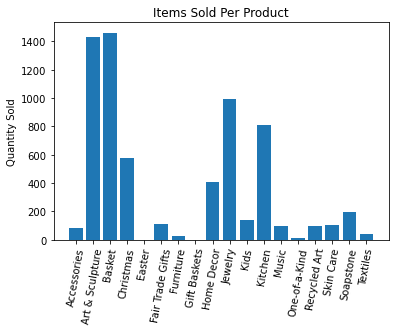

In [14]:
# plot total number of items sold for each product
# most ordered products are Art/Sculpture, Basket, and jewelry
plt.bar(product_list, sum_products_sold)
plt.xticks(rotation = 80)
plt.title("Items Sold Per Product")
plt.ylabel("Quantity Sold")

Text(0, 0.5, 'Total Sales ($)')

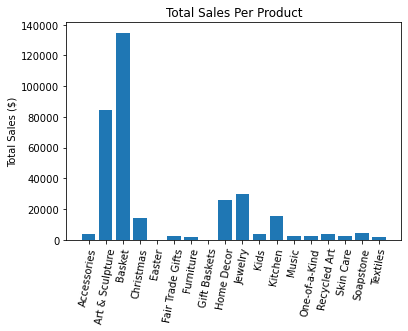

In [15]:
# total net sales for each product type
sum_products_sales = sum_by_product['Total Net Sales']
plt.bar(product_list, sum_products_sales)
plt.xticks(rotation = 80)
plt.title("Total Sales Per Product")
plt.ylabel("Total Sales ($)")

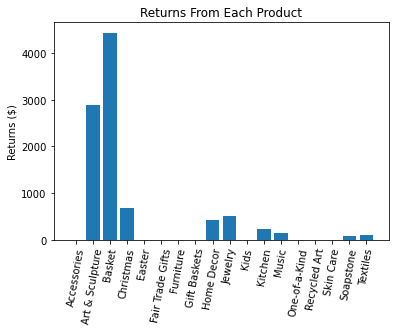

In [16]:
# most of the money lost by returns is from baskets and Art/Sculptures
returns_by_product = sum_by_product['Returns'] * -1
plt.bar(product_list, returns_by_product)
plt.xticks(rotation = 80)
plt.ylabel("Returns ($)")
plt.title("Returns From Each Product")
plt.show()

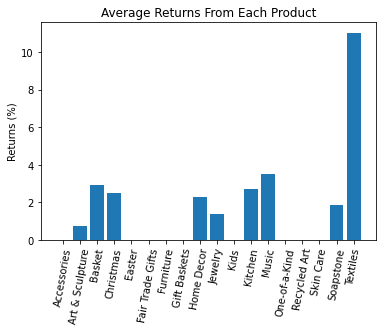

In [17]:
# highest return rat is from textiles, which are not sold often either
returns_by_product = mean_by_product['%Return']
plt.bar(product_list, returns_by_product)
plt.xticks(rotation = 80)
plt.ylabel("Returns (%)")
plt.title("Average Returns From Each Product")
plt.show()

Text(0.5, 1.0, 'Total Discounts Per Product Type')

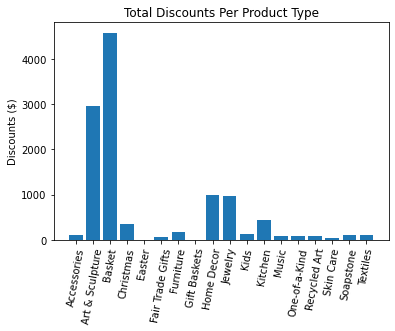

In [18]:
# most of the money from discounts is from baskets and Art/Sculpture
discount_by_product = sum_by_product['Discounts'] * -1
plt.bar(product_list, discount_by_product)
plt.xticks(rotation = 80)
plt.ylabel("Discounts ($)")
plt.title("Total Discounts Per Product Type")

Text(0.5, 1.0, 'Average Percent Discount Per Product Type')

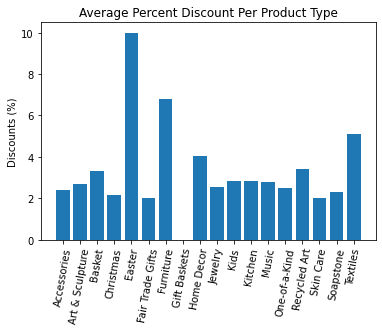

In [19]:
# Easter products have the highest percent discount
discount_by_product = mean_by_product['%Discount']
plt.bar(product_list, discount_by_product)
plt.xticks(rotation = 80)
plt.ylabel("Discounts (%)")
plt.title("Average Percent Discount Per Product Type")

In [20]:
# inspect the second data frame
# we are given monthy sales, but do not know details about the products sold
monthly_sales_df.head()

Month  Year  Total Orders  Gross Sales  Discounts  Returns  Net Sales  \
0   January  2017            73       8861.5    -129.40  -448.45    8283.65   
1  February  2017            56       6908.5    -104.70  -416.20    6387.60   
2     March  2017            60       5778.5    -172.20 -1017.20    4589.10   
3     April  2017            70       8814.0    -281.40     0.00    8532.60   
4       May  2017            54       6677.0    -185.75  -253.80    6237.45   

   Shipping  Total Sales  
0   1088.30      9371.95  
1    892.45      7280.05  
2    707.43      5296.53  
3   1068.30      9600.90  
4    866.46      7103.91

In [21]:
# data is clean
monthly_sales_df.isnull().sum()

Month           0
Year            0
Total Orders    0
Gross Sales     0
Discounts       0
Returns         0
Net Sales       0
Shipping        0
Total Sales     0
dtype: int64

In [22]:
# create new column that combines month and year
monthly_sales_df['Month-Year'] = monthly_sales_df['Month'] + ' ' + monthly_sales_df['Year'].astype(str)
monthly_sales_df['Month-Year'] 

0       January 2017
1      February 2017
2         March 2017
3         April 2017
4           May 2017
5          June 2017
6          July 2017
7        August 2017
8     September 2017
9       October 2017
10     November 2017
11     December 2017
12      January 2018
13     February 2018
14        March 2018
15        April 2018
16          May 2018
17         June 2018
18         July 2018
19       August 2018
20    September 2018
21      October 2018
22     November 2018
23     December 2018
24      January 2019
25     February 2019
26        March 2019
27        April 2019
28          May 2019
29         June 2019
30         July 2019
31       August 2019
32    September 2019
33      October 2019
34     November 2019
35     December 2019
Name: Month-Year, dtype: object

In [23]:
# demonstration of converting string to datetime object
s = monthly_sales_df['Month-Year'][0]
_format = "%B %Y"
date = datetime.strptime(s,_format) 
print(date)

2017-01-01 00:00:00


In [24]:
# use the apply function to convert each Month-Year to an actual date
monty_year_series = monthly_sales_df['Month-Year'].apply(lambda x: datetime.strptime(x,_format))
monthly_sales_df['Month-Year'] = monty_year_series
monthly_sales_df['Month-Year'].head()

0   2017-01-01
1   2017-02-01
2   2017-03-01
3   2017-04-01
4   2017-05-01
Name: Month-Year, dtype: datetime64[ns]

In [25]:
# Check type of Month-Year column - it is in fact a datetime object now
monthly_sales_df.dtypes

Month                   object
Year                     int64
Total Orders             int64
Gross Sales            float64
Discounts              float64
Returns                float64
Net Sales              float64
Shipping               float64
Total Sales            float64
Month-Year      datetime64[ns]
dtype: object

In [26]:
monthly_sales_df['Net Loss'] = (monthly_sales_df['Gross Sales'] - monthly_sales_df['Net Sales']) / (monthly_sales_df['Gross Sales']) * 100
monthly_sales_df['Net Loss'] = monthly_sales_df['Net Loss'].apply(lambda x: round(x, 0))

Text(0.5, 1.0, 'Monthly Net Loss (2017-2019)')

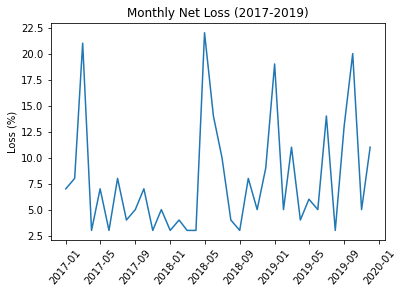

In [27]:
# plot the loss (returns + discounts) over time 
plt.plot(monthly_sales_df['Month-Year'],monthly_sales_df['Net Loss'])
plt.xticks(rotation = 50)
plt.ylabel("Loss (%)")
plt.title("Monthly Net Loss (2017-2019)")

Text(0.5, 1.0, 'Monthly Net Discounts (2017-2019)')

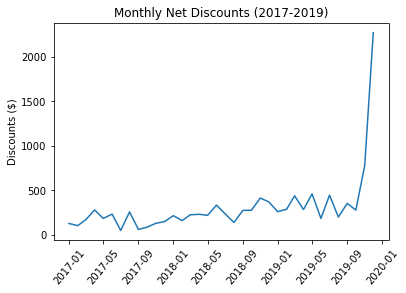

In [28]:
# Discounts increase during Christmas season
plt.plot(monthly_sales_df['Month-Year'],monthly_sales_df['Discounts'] * -1)
plt.xticks(rotation = 50)
plt.ylabel("Discounts ($)")
plt.title("Monthly Net Discounts (2017-2019)")

Text(0.5, 1.0, 'Monthly Net Returns (2017-2019)')

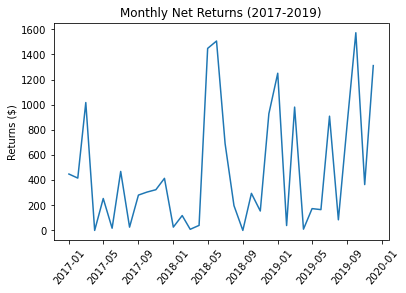

In [29]:
# Returns do not show a clear pattern, the spiked during May 2018
plt.plot(monthly_sales_df['Month-Year'],monthly_sales_df['Returns'] * -1)
plt.xticks(rotation = 50)
plt.ylabel("Returns ($)")
plt.title("Monthly Net Returns (2017-2019)")

Text(0.5, 1.0, 'Comparison of Net Loss and Monthly Returns (2017-2019)')

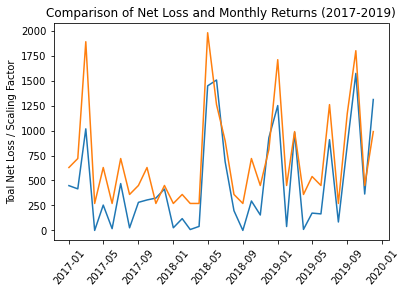

In [30]:
# most of the net loss is from returns, which can be seen after scaling the graphs
plt.plot(monthly_sales_df['Month-Year'],monthly_sales_df['Returns'] * -1)
plt.plot(monthly_sales_df['Month-Year'],monthly_sales_df['Net Loss'] * 90)
plt.xticks(rotation = 50)
plt.ylabel("Toal Net Loss / Scaling Factor")
plt.title("Comparison of Net Loss and Monthly Returns (2017-2019)")

Text(0.5, 1.0, 'Monthly Total Sales (2017-2019)')

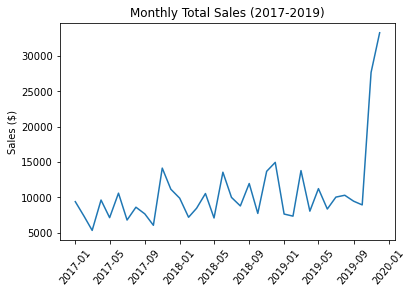

In [31]:
# total sales skyrocketed in winter 2019
plt.plot(monthly_sales_df['Month-Year'], monthly_sales_df['Total Sales'])
plt.xticks(rotation = 50)
plt.ylabel("Sales ($)")
plt.title("Monthly Total Sales (2017-2019)")

In [32]:
monthly_sales_df.groupby('Year').sum()

Total Orders  Gross Sales  Discounts  Returns  Net Sales  Shipping  \
Year                                                                       
2017           836     97342.05   -1849.15 -3972.40   91520.50  11976.77   
2018          1141    113313.15   -3112.39 -5412.58  104788.18  18780.10   
2019          1520    143762.15   -6252.24 -7713.51  129796.40  26101.23   

      Total Sales  Net Loss  
Year                         
2017    103497.27      81.0  
2018    123568.28      88.0  
2019    155900.33     116.0

In [33]:
years = monthly_sales_df.groupby('Year').sum().index.tolist()
years

[2017, 2018, 2019]

In [34]:
tot_annual_sales = monthly_sales_df.groupby('Year').sum()['Total Sales'].values.tolist()
tot_annual_sales

[103497.27, 123568.28, 155900.33000000002]

Text(0, 0.5, 'Sales ($)')

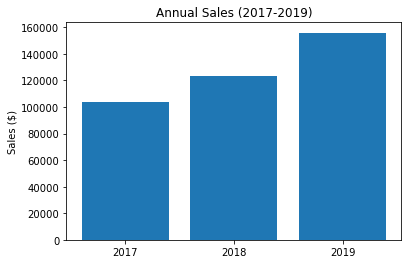

In [35]:
# total profits from each year, steady increase
plt.bar(years, tot_annual_sales)
plt.xticks(ticks=years)
plt.title("Annual Sales (2017-2019)")
plt.ylabel("Sales ($)")

In [36]:
year_2017 = monthly_sales_df.loc[monthly_sales_df['Year'] == 2017]
year_2018 = monthly_sales_df.loc[monthly_sales_df['Year'] == 2018]
year_2019 = monthly_sales_df.loc[monthly_sales_df['Year'] == 2019]

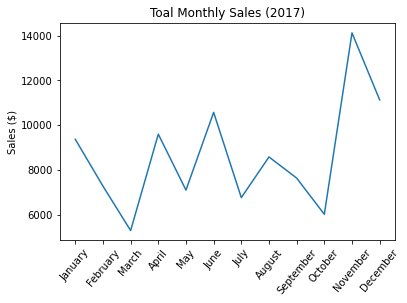

In [37]:
# Each Year, Total Sales Skyrocket From October to December, likely because of Christmas season
plt.plot(year_2017['Month'], year_2017['Total Sales'])
plt.xticks(rotation=50)
plt.ylabel("Sales ($)")
plt.title("Toal Monthly Sales (2017)")
plt.show()

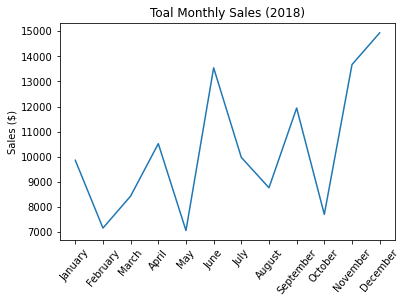

In [38]:
plt.plot(year_2018['Month'], year_2018['Total Sales'])
plt.xticks(rotation=50)
plt.ylabel("Sales ($)")
plt.title("Toal Monthly Sales (2018)")
plt.show()

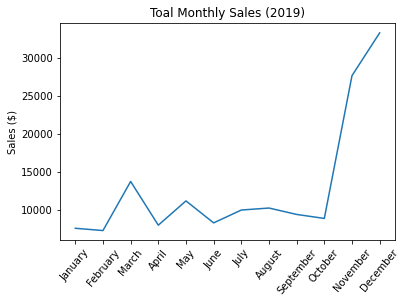

In [39]:
plt.plot(year_2019['Month'], year_2019['Total Sales'])
plt.xticks(rotation=50)
plt.ylabel("Sales ($)")
plt.title("Toal Monthly Sales (2019)")
plt.show()

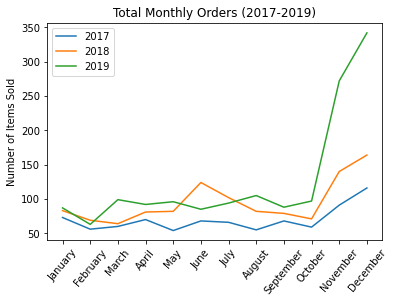

In [40]:
# orders always increase during Christmas time, decrease in January
plt.plot(year_2017['Month'], year_2017['Total Orders'])
plt.plot(year_2018['Month'], year_2018['Total Orders'])
plt.plot(year_2019['Month'], year_2019['Total Orders'])
plt.xticks(rotation=50)
plt.legend(labels = ["2017","2018","2019"])
plt.title("Total Monthly Orders (2017-2019)")
plt.ylabel("Number of Items Sold")
plt.show()

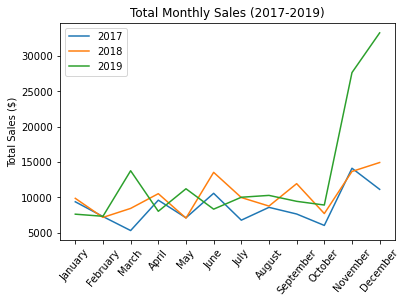

In [41]:
# Total Sales follows same pattern as total orders, as expected
plt.plot(year_2017['Month'], year_2017['Total Sales'])
plt.plot(year_2018['Month'], year_2018['Total Sales'])
plt.plot(year_2019['Month'], year_2019['Total Sales'])
plt.xticks(rotation=50)
plt.legend(labels = ["2017","2018","2019"])
plt.title("Total Monthly Sales (2017-2019)")
plt.ylabel("Total Sales ($)")
plt.show()

In [42]:
monthly_sales_df.groupby('Month').mean()

Year  Total Orders   Gross Sales   Discounts     Returns  \
Month                                                                   
April      2018.0     81.000000   8399.116667 -266.360000  -16.666667   
August     2018.0     80.666667   8187.733333 -200.380000 -102.573333   
December   2018.0    207.333333  18407.816667 -930.186667 -884.576667   
February   2018.0     62.666667   6653.800000 -184.916667 -191.016667   
January    2018.0     81.000000   8532.083333 -202.823333 -575.016667   
July       2018.0     87.333333   8498.050000 -245.480000 -689.310000   
June       2018.0     92.333333  10068.016667 -251.956667 -563.143333   
March      2018.0     74.333333   8765.566667 -279.623333 -669.000000   
May        2018.0     77.333333   8084.383333 -289.300000 -625.056667   
November   2018.0    167.666667  16341.866667 -440.863333 -280.920000   
October    2018.0     75.666667   7288.916667 -215.123333 -724.100000   
September  2018.0     78.333333   8911.766667 -230.913333 -378.116667   

              Net Sales     Shipping   Total Sales   Net Loss  
Month                                                          
April       8116.090000  1266.103333   9382.193333   3.333333  
August      7884.780000  1324.080000   9208.860000   3.666667  
December   16593.053333  3198.766667  19791.820000   8.333333  
February    6277.866667   974.403333   7252.270000   5.666667  
January     7754.243333  1194.086667   8949.230000   9.666667  
July        7563.260000  1355.263333   8918.523333  10.666667  
June        9252.916667  1561.870000  10814.786667   7.333333  
March       7816.943333  1349.816667   9166.760000  11.666667  
May         7170.026667  1289.870000   8459.896667  11.666667  
November   15620.083333  2872.300000  18492.383333   4.333333  
October     6349.693333  1196.373333   7546.066667  11.666667  
September   8302.736667  1369.766667   9672.503333   7.000000

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

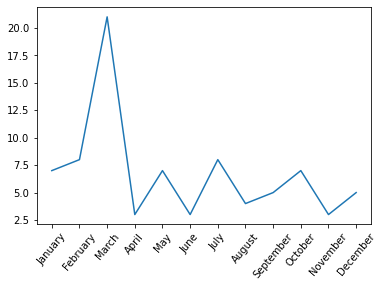

In [43]:
plt.plot(year_2017['Month'],monthly_sales_df['Net Loss'][0:12])
plt.xticks(rotation = 50)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

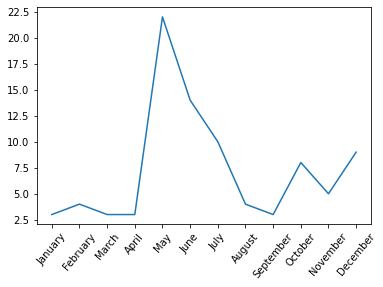

In [44]:
plt.plot(year_2018['Month'],monthly_sales_df['Net Loss'][12:24])
plt.xticks(rotation = 50)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

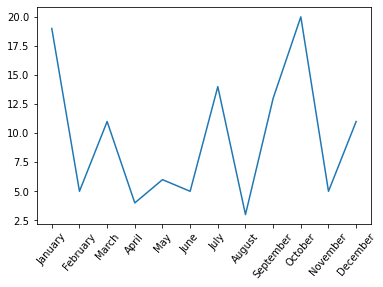

In [45]:
plt.plot(year_2019['Month'],monthly_sales_df['Net Loss'][24:36])
plt.xticks(rotation = 50)

r value: 0.4681075137829214
p value: 0.003987827522090937


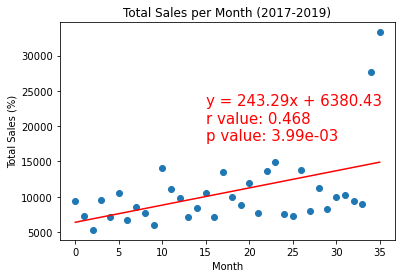

In [46]:
# regression analysis: $243 increase in sales per month, and is statistically significant
(slope, intercept, r_value, p_value, std_err) = linregress(monthly_sales_df['Month-Year'].index.tolist(), monthly_sales_df['Total Sales'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(i * slope + intercept) for i in monthly_sales_df['Month-Year'].index.tolist()]
plt.scatter(monthly_sales_df['Month-Year'].index, monthly_sales_df['Total Sales'])
plt.plot(monthly_sales_df['Month-Year'].index.tolist(),regress_values,"r")
plt.annotate(line_eq, (15, 23000), fontsize=15, color="red")
plt.annotate(f"r value: {round(r_value,3)}\np value: {'{:0.2e}'.format(p_value)}", (15, 18000), fontsize=15, color="red")
print(f"r value: {r_value}\np value: {p_value}")
plt.title("Total Sales per Month (2017-2019)")
plt.ylabel("Total Sales (%)")
plt.xlabel("Month")
plt.show()

r value: 0.18425349821542134
p_value: 0.2820396118194007


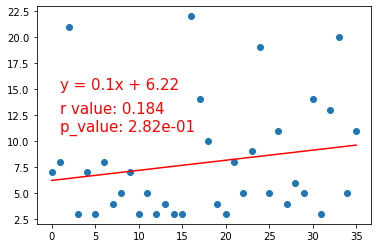

In [47]:
# no trend b/w net loss and time, which is good news
(slope, intercept, r_value, p_value, std_err) = linregress(monthly_sales_df['Month-Year'].index.tolist(), monthly_sales_df['Net Loss'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(i * slope + intercept) for i in monthly_sales_df['Month-Year'].index.tolist()]
plt.scatter(monthly_sales_df['Month-Year'].index, monthly_sales_df['Net Loss'])
plt.plot(monthly_sales_df['Month-Year'].index.tolist(),regress_values,"r")
plt.annotate(line_eq, (1, 15), fontsize=15, color="red")
plt.annotate(f"r value: {round(r_value,3)}\np_value: {'{:0.2e}'.format(p_value)}", (1, 11), fontsize=15, color="red" )
print(f"r value: {r_value}\np_value: {p_value}")
plt.show()

r value: 0.318
p_value: 7.30e-43


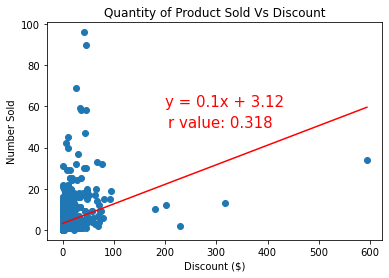

In [48]:
(slope, intercept, r_value, p_value, std_err) = linregress((sales_df['Discounts']*-1).values.tolist(), sales_df['Net Quantity'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(i * slope + intercept) for i in (sales_df['Discounts']*-1).values.tolist()]
plt.scatter((sales_df['Discounts']*-1) ,sales_df['Net Quantity'])
plt.plot((sales_df['Discounts']*-1).values.tolist(),regress_values,"r")
plt.annotate(line_eq, (200, 60), fontsize=15, color="red")
plt.annotate(f"r value: {round(r_value,3)}", (205, 50), fontsize=15, color="red")
print(f"r value: {round(r_value,3)}\np_value: {'{:0.2e}'.format(p_value)}")
plt.title("Quantity of Product Sold Vs Discount")
plt.ylabel("Number Sold")
plt.xlabel("Discount ($)")
plt.show()

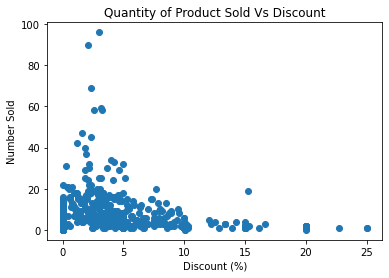

In [49]:
# curve shows non-linear decay, with a maximum around 2.5%
plt.scatter((sales_df['%Discount']) ,sales_df['Net Quantity'])
plt.title("Quantity of Product Sold Vs Discount")
plt.ylabel("Number Sold")
plt.xlabel("Discount (%)")
plt.show()

r value: 0.838745860189725
p_value: 0.00e+00
r^2: 0.7034946179854017


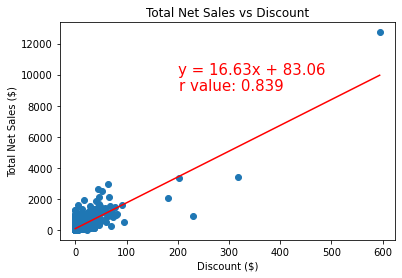

In [50]:
(slope, intercept, r_value, p_value, std_err) = linregress((sales_df['Discounts']*-1).values.tolist(), sales_df['Total Net Sales'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(i * slope + intercept) for i in (sales_df['Discounts']*-1).values.tolist()]
plt.scatter((sales_df['Discounts']*-1) ,sales_df['Total Net Sales'])
plt.plot((sales_df['Discounts']*-1).values.tolist(),regress_values,"r")
plt.annotate(line_eq, (200, 10000), fontsize=15, color="red")
plt.annotate(f"r value: {round(r_value,3)}", (202, 9000), fontsize=15, color="red")
print(f"r value: {r_value}\np_value: {'{:0.2e}'.format(p_value)}\nr^2: {r_value * r_value}")
plt.title("Total Net Sales vs Discount")
plt.xlabel("Discount ($)")
plt.ylabel("Total Net Sales ($)")
plt.show()

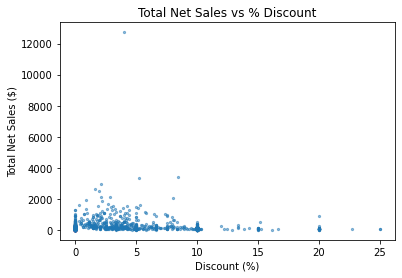

In [51]:
# decay with a maximum near 2.5%, like previous scatter plot
plt.scatter((sales_df['%Discount']) ,sales_df['Total Net Sales'], s = 5, alpha = 0.5)
plt.title("Total Net Sales vs % Discount")
plt.xlabel("Discount (%)")
plt.ylabel("Total Net Sales ($)")
plt.show()

In [52]:
sales_df

Product Type  Net Quantity  Gross Sales  Discounts  Returns  \
0     Art & Sculpture            34      14935.0    -594.00 -1609.00   
1              Basket            13       3744.0    -316.80     0.00   
2              Basket            12       3825.0    -201.60  -288.00   
3              Basket            17       3035.0     -63.25     0.00   
4     Art & Sculpture            47       2696.8     -44.16     0.00   
...               ...           ...          ...        ...      ...   
1769        Christmas             0        380.0       0.00  -380.00   
1770          Kitchen             0         28.0      -2.81   -25.19   
1771          Jewelry             0         28.0       0.00   -28.00   
1772           Basket             0        116.0     -23.20   -92.80   
1773          Kitchen             0         16.5       0.00   -16.50   

      Total Net Sales  %Discount     %Return  
0            12732.00   3.977235   10.773351  
1             3427.20   8.461538   -0.000000  
2             3335.40   5.270588    7.529412  
3             2971.75   2.084020   -0.000000  
4             2652.64   1.637496   -0.000000  
...               ...        ...         ...  
1769             0.00  -0.000000  100.000000  
1770             0.00  10.035714   89.964286  
1771             0.00  -0.000000  100.000000  
1772             0.00  20.000000   80.000000  
1773             0.00  -0.000000  100.000000  

[1766 rows x 8 columns]

In [53]:
sales_df[sales_df['Total Net Sales'] < 0]

Empty DataFrame
Columns: [Product Type, Net Quantity, Gross Sales, Discounts, Returns, Total Net Sales, %Discount, %Return]
Index: []

In [54]:
sales_per_item = sales_df.groupby('Product Type').sum()['Total Net Sales'] / sales_df.groupby('Product Type').sum()['Net Quantity']

Text(0, 0.5, 'Revenue ($)')

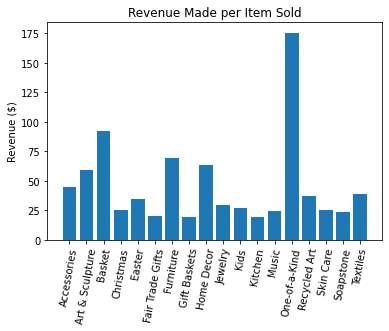

In [55]:
# increase revenue by producing more one-of-a-kind products
plt.bar(sales_per_item.index.tolist(), sales_per_item.values.tolist())
plt.xticks(rotation = 80)
plt.title("Revenue Made per Item Sold")
plt.ylabel("Revenue ($)")

In [56]:
# total order made from 2017 - 2019
total_orders = sum(monthly_sales_df['Total Orders'].values.tolist())
total_orders

3497

In [57]:
# total items sold from 2017-2019
total_items_sold = sum(sales_df['Net Quantity'].values.tolist())
total_items_sold

6583

In [58]:
# each order consists of two items on average
avg_order = round(total_items_sold / total_orders, 2)
avg_order

1.88

In [59]:
#Questions to Answer
# Are Sales Increasing? --> Yes
# What products are selling the most? --> Basket, Art & Sculpture, jewelry
# What products are selling the least? --> Easter, Gift Baskets, One-of-a-kind
# Do Higher Discounts result in more products sold? Total Net Sales? --> No
# What products are increasing the most in demand? --> cannot determine
# textiles should be discountinued if necessary